<a href="https://colab.research.google.com/github/PHANIHARSHITH/AIML-LAB/blob/main/29_11_23%2C4245%2CDecision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/content/possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [5]:
df.isnull()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,False,False,False,False,False,False,False,False,False,False,False,False,False,False
100,False,False,False,False,False,False,False,False,False,False,False,False,False,False
101,False,False,False,False,False,False,False,False,False,False,False,False,False,False
102,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
#dropna() removes the rows that have NULL values
df=df.dropna()
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [9]:
x= df.drop(["case","site","Pop","sex","age"],axis=1)
y=df["age"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=44)

In [12]:
from sklearn.tree import DecisionTreeRegressor

In [13]:
model=DecisionTreeRegressor(random_state=44)
model.fit(x_train,y_train)
predictions=model.predict(x_test)

In [14]:
print(predictions)

[7. 2. 9. 5. 2. 4. 7. 1. 2. 2. 3. 2. 3. 7. 3. 6. 2. 2. 2. 1. 4. 2. 2. 3.
 3. 4. 7. 3. 7. 4. 5.]


In [15]:
x_test

,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
57,94.5,64.2,91.0,39.0,66.5,46.4,14.4,30.5,33.0
80,90.6,56.0,85.5,38.0,65.6,41.7,17.0,27.5,35.0
27,93.8,56.8,87.0,34.5,73.2,53.0,15.3,27.0,30.0
97,93.2,68.6,84.0,35.0,65.6,44.3,14.5,28.5,32.0
61,91.3,58.0,90.5,39.0,65.5,41.3,16.0,27.0,32.0
69,91.9,56.4,87.0,38.0,65.4,44.1,13.0,27.0,34.0
7,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
26,90.5,54.5,85.0,35.0,70.3,50.8,14.2,23.0,28.0
24,95.8,58.5,91.5,35.5,72.3,51.6,14.9,31.0,35.0
65,90.4,55.8,86.0,36.5,63.2,44.2,15.7,26.5,34.0


In [19]:
y_test

57     3.0
80     3.0
27     4.0
97     5.0
61     3.0
69     7.0
7      6.0
26     2.0
24     3.0
65     3.0
71     1.0
30     3.0
38     1.0
76     6.0
19     4.0
103    3.0
44     3.0
33     2.0
11     5.0
72     1.0
83     3.0
39     3.0
5      1.0
73     4.0
51     6.0
94     4.0
56     4.0
96     3.0
89     3.0
90     3.0
98     3.0
Name: age, dtype: float64

In [20]:
model.predict([[92.4,56.0,80.5,35.5,68.4,49.5,15.9,27.0,30.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([7.])

[Text(0.32659313725490197, 0.9444444444444444, 'hdlngth <= 91.55\nsquared_error = 4.128\nsamples = 70\nvalue = 4.014'),
 Text(0.058823529411764705, 0.8333333333333334, 'chest <= 23.75\nsquared_error = 0.888\nsamples = 20\nvalue = 2.25'),
 Text(0.0392156862745098, 0.7222222222222222, 'squared_error = 0.0\nsamples = 4\nvalue = 1.0'),
 Text(0.0784313725490196, 0.7222222222222222, 'footlgth <= 63.0\nsquared_error = 0.621\nsamples = 16\nvalue = 2.562'),
 Text(0.0392156862745098, 0.6111111111111112, 'eye <= 14.7\nsquared_error = 0.24\nsamples = 5\nvalue = 3.4'),
 Text(0.0196078431372549, 0.5, 'squared_error = 0.0\nsamples = 3\nvalue = 3.0'),
 Text(0.058823529411764705, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 4.0'),
 Text(0.11764705882352941, 0.6111111111111112, 'skullw <= 54.65\nsquared_error = 0.331\nsamples = 11\nvalue = 2.182'),
 Text(0.09803921568627451, 0.5, 'squared_error = 0.0\nsamples = 2\nvalue = 3.0'),
 Text(0.13725490196078433, 0.5, 'taill <= 39.75\nsquared_error = 0.222\n

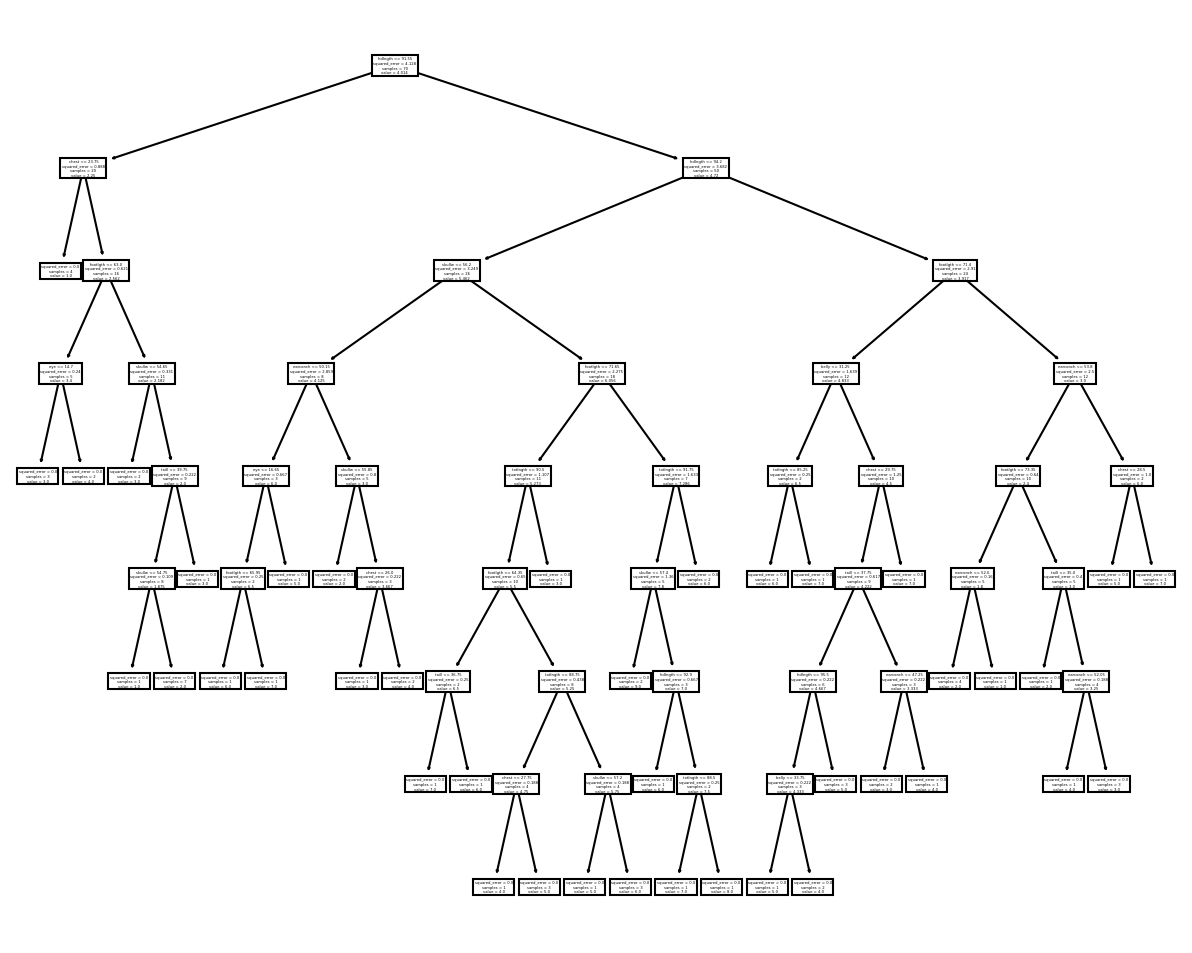

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,8),dpi=150)
plot_tree(model,feature_names=x.columns)